In [1]:
# %pip install wget
# !python -m wget  https://www.gutenberg.org/cache/epub/2000/pg2000.txt

In [2]:
import pandas as pd
from pathlib import Path

In [3]:
import time

In [4]:
import itertools

In [5]:
from textwrap import wrap

In [6]:
recursos = Path.cwd() / "recursos"
pi_file = recursos / 'pi50kdigits.txt'
pi_file.exists()

quijote_file = recursos / 'pg2000.txt'
quijote_file.exists()

True

In [7]:
# open quijote_file and read it as utf-8    
with open(quijote_file, 'r', encoding='utf-8-sig') as file:
    # read the file betwtween the 37th and last 372 lines
    quijote_data = file.readlines()[36:-372]

# join the lines into a single string
quijote_data = ''.join(quijote_data)



u = len(list( dict.fromkeys(quijote_data)))
print(u)


# longitud en caracteres del texto
l = len(quijote_data)
print(l)


91
2097953


comprobamos que en los 2500 primeros caracteres ya tenemos el 70 del charset

In [8]:

# count the number of unique characters cumulatively every 1000 characters

u1000list = []
for i in range(0,3000,1):
    u1000list.append(len(list( dict.fromkeys(quijote_data[:i]))))


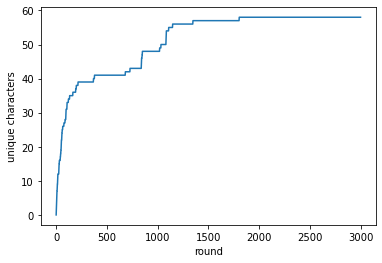

In [9]:

# and plot it in a big graph to see the trend
import matplotlib.pyplot as plt
# set matplotlib to generate a big graph in high resolution and fill the screen
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams["savefig.pad_inches"] = 0.1
plt.rcParams["savefig.transparent"] = True
plt.rcParams["savefig.format"] = 'png'
plt.rcParams["savefig.facecolor"] = 'white'
plt.rcParams["savefig.edgecolor"] = 'white'
plt.rcParams["savefig.orientation"] = 'landscape'


plt.plot(u1000list)
plt.ylabel('unique characters')
plt.xlabel('round')
plt.show()


In [10]:
# count the number of unique characters cumulatively every 1000 characters

u1000list = []
for i in range(0,l,1000):
    u1000list.append(len(list( dict.fromkeys(quijote_data[:i]))))


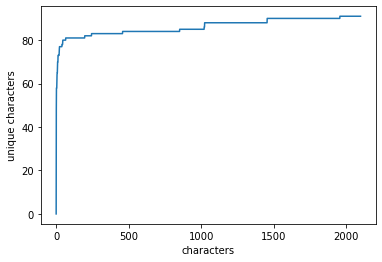

In [11]:

# and plot it in a big graph to see the trend
import matplotlib.pyplot as plt
plt.plot(u1000list)
plt.ylabel('unique characters')
plt.xlabel('characters')
plt.show()


In [12]:
#list the list of unique characters in the text concatenated and sorted alphabetically
charset = sorted(list( dict.fromkeys(quijote_data)))

print ("".join(charset), len(charset))



 !"'(),-.01234567:;?ABCDEFGHIJLMNOPQRSTUVWXYZ]abcdefghijlmnopqrstuvxyz¡«»¿ÁÉÍÑÓÚàáéíïñóùúü 91


In [13]:
# distribution of the characters in the text
# this is a dictionary with the character as key and the number of times it appears as value
from collections import Counter
c = Counter(quijote_data)

sorted(c.items(), key=lambda x: x[1], reverse=True)

# save the collection sorted by occurences
sorted_c = sorted(c.items(), key=lambda x: x[1], reverse=True)


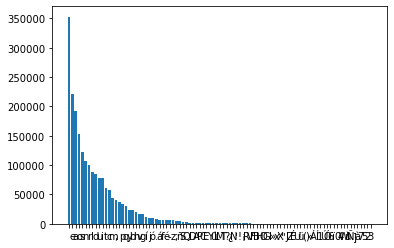

In [14]:

# plot of the  values in sorted_c list of tuples

plt.bar(range(u), [x[1] for x in sorted_c[:u]], align='center')
plt.xticks(range(u), [x[0] for x in sorted_c[:u]])
plt.show()


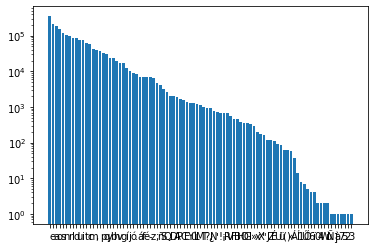

In [15]:

# this bar chart is not very useful, so we can plot it in log scale

plt.bar(range(u), [x[1] for x in sorted_c[:u]], align='center')
plt.xticks(range(u), [x[0] for x in sorted_c[:u]])
plt.yscale('log')
plt.show()



In [16]:
# let's continue with the analysis of the text. we are going to tokenize it into words, and then into characters.
# we will use the nltk library for this

%pip install nltk
import nltk
nltk.download('punkt')

# tokenize the text into words
words = nltk.word_tokenize(quijote_data)

# tokenize the text into characters
chars = list(quijote_data)

# count the number of unique words
uwords = len(list( dict.fromkeys(words)))
print(uwords)

# count the number of unique characters
uchars = len(list( dict.fromkeys(chars)))
print(uchars)



Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joaqu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


25391
91


In [17]:
# let's analyze the distribution of the words in the text. we will use the Counter class from collections
from collections import Counter
cwords = Counter(words)

# save the collection sorted by occurences
sorted_cwords = sorted(cwords.items(), key=lambda x: x[1], reverse=True)

# print the most common words larger than 3 characters
for i in range(0,100):
    if len(sorted_cwords[i][0]) > 4:
        print(sorted_cwords[i]) 



('Quijote', 1642)
('Sancho', 1624)
('porque', 1330)
('había', 1026)
('señor', 948)
('merced', 900)
('-dijo', 877)
('vuestra', 813)
('-respondió', 813)
('todos', 796)
('cuando', 711)
('donde', 625)
('quien', 614)
('decir', 577)
('caballero', 561)
('hacer', 535)
('aunque', 525)
('Quijote-', 522)
('Sancho-', 507)
('señora', 501)
('aquel', 482)
('estaba', 461)
('sobre', 450)
